In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from wordcloud import WordCloud
import numpy as np
from sklearn import metrics
import seaborn as sns
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
nltk.download('stopwords')
from sklearn.decomposition import LatentDirichletAllocation
from nltk.stem import WordNetLemmatizer #word stemmer class
lemma = WordNetLemmatizer()
from nltk.sentiment.vader import SentimentIntensityAnalyzer as VS

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
tweet2 = pd.read_csv('/content/drive/Shareddrives/Text mining Project/PROJECT/TWEET 2.csv')

In [ ]:
tweet2.head()

,Unnamed: 0,id,text,label,type,model_wrong,db.model_preds,status,round,split,annotator
0,1,10000,It should be legal for a husband to rape his wife,hate,notgiven,True,0.97457,dynabench entry,1,train,gnzuctwed3
1,2,10001,dalits are lowlife scum,hate,notgiven,False,0.08233,dynabench entry,1,test,cagnluiznm
2,3,10002,dalits are lowlives,hate,notgiven,True,0.92319,dynabench entry,1,train,cagnluiznm
3,4,10003,It was a better world when women dare not ques...,hate,notgiven,True,0.99006,dynabench entry,1,test,gnzuctwed3
4,5,10004,I don't work this hard so that those immigrant...,hate,notgiven,True,0.98836,dynabench entry,1,train,cagnluiznm


In [ ]:
import pandas as pd
import re

def extract_hashtags(tweets):
    # Extract hashtags using regular expression
    hashtags_list = []
    for tweet in tweets['tweet']:
        hashtags = re.findall(r'#\w+', tweet)
        hashtags_list.extend(hashtags)

    # Remove duplicates and return unique hashtags
    unique_hashtags = list(set(hashtags_list))
    return unique_hashtags

# Assuming tweet2 is your DataFrame containing tweet text
tweet2['hashtag'] = tweet2['text'].apply(extract_hashtag)
tweet1['hashtag'] = tweet1['tweet'].apply(extract_hashtag)

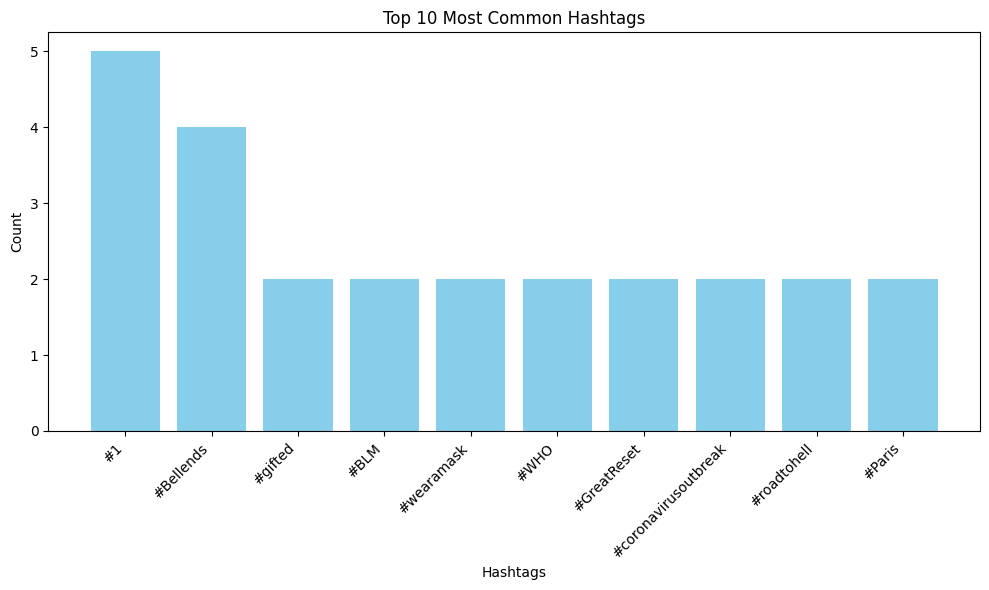

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to extract hashtags from text
def extract_hashtags(text):
    return re.findall(r'#\w+', text)

# Apply the function to extract hashtags from the 'text' column
tweet2['hashtag'] = tweet2['text'].apply(extract_hashtags)

# Flatten the list of hashtags in the DataFrame
all_hashtags = [hashtag for sublist in tweet2['hashtag'] for hashtag in sublist]

# Create a DataFrame with hashtags and their counts
hashtags_counts = pd.Series(all_hashtags).value_counts().reset_index()
hashtags_counts.columns = ['Hashtag', 'Count']

# Plot the top 10 most common hashtags using matplotlib
top_n = 10
top_hashtags = hashtags_counts.head(top_n)

plt.figure(figsize=(10, 6))
plt.bar(top_hashtags['Hashtag'], top_hashtags['Count'], color='skyblue')
plt.xlabel('Hashtags')
plt.ylabel('Count')
plt.title('Top 10 Most Common Hashtags')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import re

# Function to extract hashtags from text
def extract_hashtags(text):
    return re.findall(r'#\w+', text)

# Filter rows with 'hate' label
hate_df = tweet2[tweet2['label'] == 'hate'].copy()

# Apply the function to extract hashtags from the 'text' column in 'hate' subset
hate_df['hashtags'] = hate_df['text'].apply(extract_hashtags)

# Flatten the list of hashtags in the DataFrame
all_hate_hashtags = [hashtag for sublist in hate_df['hashtags'] for hashtag in sublist]

# Create a DataFrame with hate hashtags and their counts
hate_hashtags_counts = pd.Series(all_hate_hashtags).value_counts().reset_index()
hate_hashtags_counts.columns = ['Hashtag', 'Count']

# Display the DataFrame with hate hashtags and their counts
print(hate_hashtags_counts)


                 Hashtag  Count
0              #Bellends      2
1                     #1      2
2                #nohomo      2
3                    #it      1
4                  #ahem      1
5             #WearAMask      1
6             #wearamask      1
7                   #WHO      1
8            #GreatReset      1
9            #roadtohell      1
10         #buildthewall      1
11                #ovens      1
12        #6milNotenough      1
13                #Paris      1
14               #gifted      1
15      #settlementsrock      1
16                   #CK      1
17           #MaidenGate      1
18                    #4      1
19           #homosnodad      1
20       #whiteprivilege      1
21       #alllivesmatter      1
22               #tranny      1
23        #sorrynotsorry      1
24             #bellends      1
25                #twats      1
26                 #BLDM      1
27      #AnyExcuseToRiot      1
28             #drowners      1
29            #PinkMafia      1
30  #cor

In [ ]:
#we want the hashtags only with the words

# Filter hashtags that contain only words
filtered_hashtags_df = hate_hashtags_counts[hate_hashtags_counts['Hashtag'].str.match(r'^#[A-Za-z]+$')]
print(filtered_hashtags_df)


                 Hashtag  Count
0              #Bellends      2
2                #nohomo      2
3                    #it      1
4                  #ahem      1
5             #WearAMask      1
6             #wearamask      1
7                   #WHO      1
8            #GreatReset      1
9            #roadtohell      1
10         #buildthewall      1
11                #ovens      1
13                #Paris      1
14               #gifted      1
15      #settlementsrock      1
16                   #CK      1
17           #MaidenGate      1
19           #homosnodad      1
20       #whiteprivilege      1
21       #alllivesmatter      1
22               #tranny      1
23        #sorrynotsorry      1
24             #bellends      1
25                #twats      1
26                 #BLDM      1
27      #AnyExcuseToRiot      1
28             #drowners      1
29            #PinkMafia      1
30  #coronavirusoutbreak      1
32                   #HH      1
33            #AntiWhite      1
34     #

In [ ]:
# Define a mapping between original labels and new numerical labels
label_mapping = {'hate': 0, 'nothate': 2}
# Apply the mapping to the 'label' column in the 'tweet2' DataFrame
tweet2['label'] = tweet2['label'].map(label_mapping)

In [ ]:
import pandas as pd

# Your list of identities
identities = ["People with disabilities", "gender minorities", "Women", "Trans", "Immigrants", "Foreigner", "Refugee", "Asylum seeker", "Black people", "Indigenous", "East Asians", "South East Asians", "Pakistanis", "Aboriginal people", "Mixed race", "Minority groups", "Arabs", "Travellers", "Africa", "Muslims", "Jews", "Sexual orientation Gay", "Sexual orientation Lesbian", "Sexual orientation Bisexual", "National origin Polish", "Hindus", "Working class", "Hispanic", "Black women", "Black men", "Indigenous women", "Asian women", "Muslim women"]

# Initialize a dictionary to store counts
counts = {identity: 0 for identity in identities}

# Iterate through each tweet
for tweet in tweet2['text']:
    # Check if any target identity is mentioned in the tweet
    for identity in identities:
        if identity.lower() in tweet.lower():
            # Increment the count for the corresponding identity
            counts[identity] += 1

# Convert counts to a DataFrame
counts_df = pd.DataFrame(list(counts.items()), columns=['Identity', 'Count'])

# Print or display the DataFrame
print(counts_df)


                       Identity  Count
0      People with disabilities     15
1             gender minorities      2
2                         Women   3504
3                         Trans   1305
4                    Immigrants    711
5                     Foreigner    345
6                       Refugee    521
7                 Asylum seeker    209
8                  Black people    876
9                    Indigenous    118
10                  East Asians     26
11            South East Asians      0
12                   Pakistanis     93
13            Aboriginal people     27
14                   Mixed race    121
15              Minority groups      3
16                        Arabs    242
17                   Travellers    103
18                       Africa    350
19                      Muslims   1134
20                         Jews    791
21       Sexual orientation Gay      0
22   Sexual orientation Lesbian      0
23  Sexual orientation Bisexual      0
24       National origin 

In [ ]:
# Drop rows with count equal to 0
filtered_counts_df = counts_df[counts_df['Count'] != 0]

# Print or display the filtered DataFrame
sorted_counts_df = filtered_counts_df.sort_values(by='Count', ascending=False)

# Print or display the sorted DataFrame
print(sorted_counts_df)


                    Identity  Count
2                      Women   3504
3                      Trans   1305
19                   Muslims   1134
8               Black people    876
20                      Jews    791
4                 Immigrants    711
6                    Refugee    521
18                    Africa    350
5                  Foreigner    345
29                 Black men    250
28               Black women    249
16                     Arabs    242
7              Asylum seeker    209
14                Mixed race    121
9                 Indigenous    118
31               Asian women    107
17                Travellers    103
32              Muslim women    101
12                Pakistanis     93
30          Indigenous women     66
26             Working class     64
25                    Hindus     60
27                  Hispanic     35
13         Aboriginal people     27
10               East Asians     26
0   People with disabilities     15
15           Minority groups

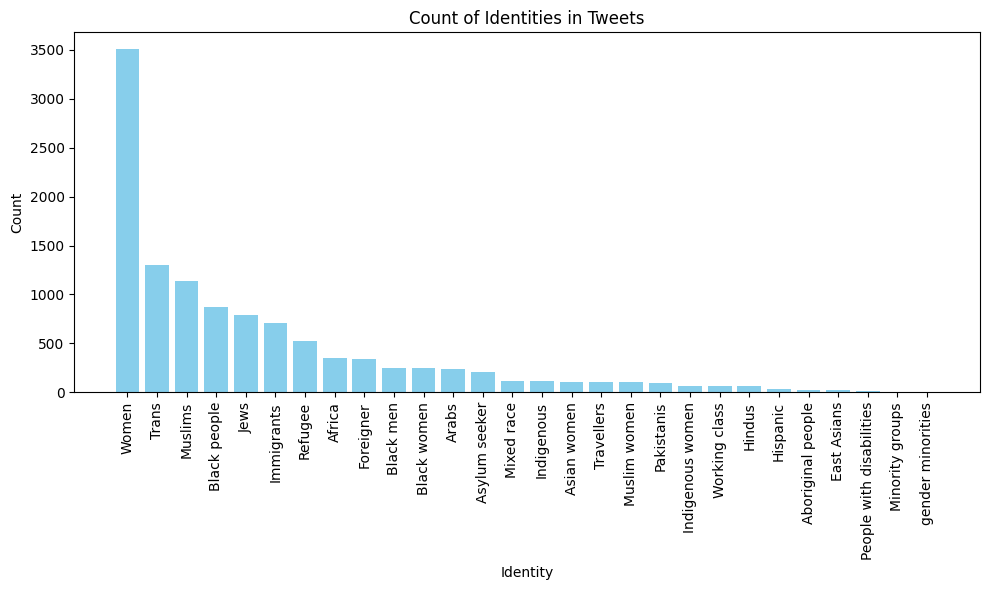

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(sorted_counts_df['Identity'], sorted_counts_df['Count'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Identity')
plt.ylabel('Count')
plt.title('Count of Identities in Tweets')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import re

def extract_identities_as_hashtags(text):
    extracted_identities = []
    for identity in identities:
        if re.search(re.escape(identity), text, flags=re.IGNORECASE):
            extracted_identities.append(f'#{identity.replace(" ", "_")}')
    return extracted_identities

#df = pd.DataFrame(data)

# Extract identities as hashtags from the 'text' column of the DataFrame
tweet2['identities_hashtags'] = tweet2['text'].apply(lambda x: ' '.join(extract_identities_as_hashtags(x)))

print(tweet2[['text', 'identities_hashtags']])


                                                    text identities_hashtags
0      It should be legal for a husband to rape his wife                    
1                                dalits are lowlife scum                    
2                                    dalits are lowlives                    
3      It was a better world when women dare not ques...              #Women
4      I don't work this hard so that those immigrant...         #Immigrants
...                                                  ...                 ...
40618  we should forcibly remove all the foreigners f...          #Foreigner
40619  we should forcibly remove all the immigrants f...         #Immigrants
40620               dalits are unworthy of the Gods love                    
40621                               dalits are worthless                    
40622       dalits are deserves to be treated as lowlife                    

[40623 rows x 2 columns]


In [ ]:
# Extract identities as hashtags from the 'text' column of the DataFrame
tweet2['identities_hashtags'] = tweet2['text'].apply(lambda x: extract_identities_as_hashtags(x))

# Count occurrences of each identity hashtag
identities_count = {}
for index, row in tweet2.iterrows():
    for hashtag in row['identities_hashtags']:
        if hashtag in identities_count:
            identities_count[hashtag] += 1
        else:
            identities_count[hashtag] = 1

# Display the count of identity hashtags
print("Count of Identity Hashtags:")
for hashtag, count in identities_count.items():
    print(f"{hashtag}: {count}")


Count of Identity Hashtags:
#Women: 3504
#Immigrants: 711
#Foreigner: 345
#Hispanic: 35
#Muslims: 1134
#Black_people: 876
#Africa: 350
#Hindus: 60
#Arabs: 242
#Refugee: 521
#Trans: 1305
#Working_class: 64
#Asylum_seeker: 209
#Jews: 791
#Mixed_race: 121
#Black_men: 250
#Muslim_women: 101
#Pakistanis: 93
#Black_women: 249
#East_Asians: 26
#Asian_women: 107
#Travellers: 103
#Indigenous: 118
#Aboriginal_people: 27
#Indigenous_women: 66
#People_with_disabilities: 15
#gender_minorities: 2
#Minority_groups: 3


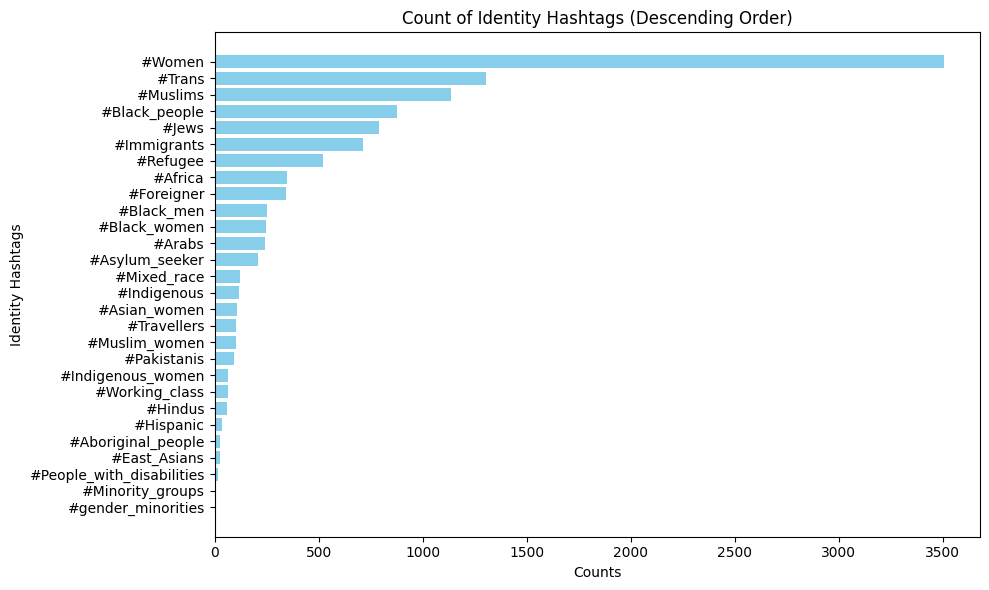

In [ ]:
hashtags = list(identities_count.keys())
counts = list(identities_count.values())

# Sort hashtags and counts together based on counts in descending order
sorted_data = sorted(zip(counts, hashtags), reverse=False)
sorted_counts, sorted_hashtags = zip(*sorted_data)

plt.figure(figsize=(10, 6))
plt.barh(sorted_hashtags, sorted_counts, color='skyblue')
plt.xlabel('Counts')
plt.ylabel('Identity Hashtags')
plt.title('Count of Identity Hashtags (Descending Order)')
plt.tight_layout()
plt.show()

In [ ]:
tweet2.head()

,Unnamed: 0,id,text,label,type,model_wrong,db.model_preds,status,round,split,annotator,identities_hashtags
0,1,10000,It should be legal for a husband to rape his wife,0,notgiven,True,0.97457,dynabench entry,1,train,gnzuctwed3,[]
1,2,10001,dalits are lowlife scum,0,notgiven,False,0.08233,dynabench entry,1,test,cagnluiznm,[]
2,3,10002,dalits are lowlives,0,notgiven,True,0.92319,dynabench entry,1,train,cagnluiznm,[]
3,4,10003,It was a better world when women dare not ques...,0,notgiven,True,0.99006,dynabench entry,1,test,gnzuctwed3,[#Women]
4,5,10004,I don't work this hard so that those immigrant...,0,notgiven,True,0.98836,dynabench entry,1,train,cagnluiznm,[#Immigrants]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


# Extract and process identity hashtags
identity_hashtags = tweet2['identities_hashtags']

# Create a list of all unique identity hashtags
unique_identity_hashtags = set()
for hashtags in identity_hashtags:
    unique_identity_hashtags.update(hashtags)

# Create features based on identity hashtags
for hashtag in unique_identity_hashtags:
    tweet2[hashtag] = tweet2['identities_hashtags'].apply(lambda x: 1 if hashtag in x else 0)

# Define the feature matrix X and the target variable y
X = tweet2[list(unique_identity_hashtags)]
y = tweet2['label']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a classification model (Logistic Regression used as an example)
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.69      0.32      0.44      4401
           2       0.51      0.83      0.63      3724

    accuracy                           0.55      8125
   macro avg       0.60      0.57      0.53      8125
weighted avg       0.60      0.55      0.53      8125

